In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as smf
import warnings
warnings.filterwarnings("ignore")

# Import Data Set

In [3]:

data = pd.read_csv("Salary_Data.csv")
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


## Performing EDA

In [4]:
#Checking is there any missing values or not

<AxesSubplot:>

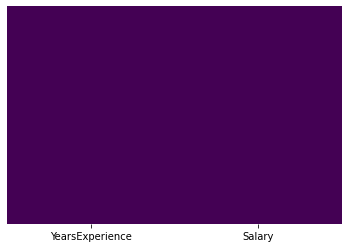

In [18]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap="viridis")#Here we see no any faded color is shown, so data has no any missing values

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


###  Defining response variable(y) and explanatory variable(x)

In [20]:
x=data["YearsExperience"]
y=data["Salary"]

### Scatter plot and correlation analysis

Text(0, 0.5, 'Years experience')

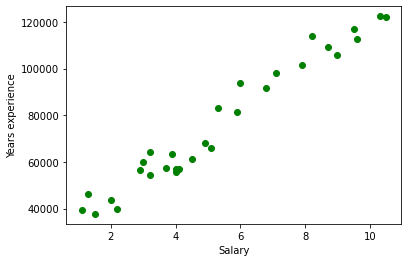

In [26]:
plt.scatter(x,y,color="green")
plt.xlabel("Salary")
plt.ylabel("Years experience")

#### Correlation analysis

In [40]:
data.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


<AxesSubplot:>

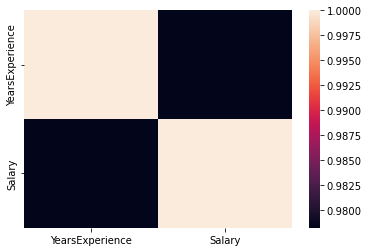

In [29]:
sns.heatmap(data.corr())

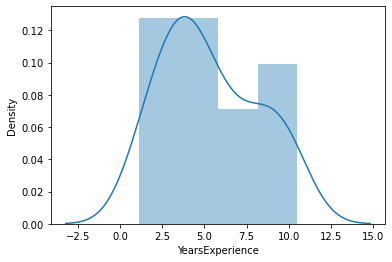

In [55]:
sns.distplot(x)
plt.show()


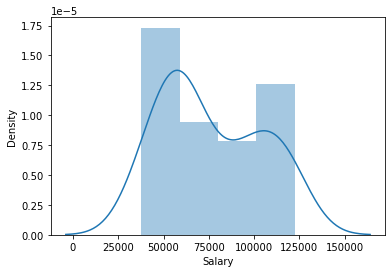

In [56]:
sns.distplot(y)
plt.show()


## Model fitting

Fitting a Linear Regression Model

In [77]:
x2=smf.add_constant(x)
model = smf.OLS(y,x2).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Fri, 08 Jul 2022   Prob (F-statistic):           1.14e-20
Time:                        08:28:39   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Standardised residual plot corresponding first order model

In [78]:
E=model.resid_pearson#Residual
E

array([ 0.54520896,  1.40418217, -0.38632031, -0.20163464, -1.15596979,
        0.59514885,  1.03793812, -0.27418681,  1.45343166, -0.61642477,
        0.09863781, -1.34720543, -1.1462834 , -1.28812023, -1.24492716,
       -0.71851921, -1.37484017,  1.24578559, -0.03178436,  1.9777821 ,
        0.29128615,  0.93050694,  0.14772822,  1.81920104,  0.24603492,
       -0.90870332,  0.24223936, -0.66976978, -0.12712026, -0.54330225])

In [80]:
y_hat=model.predict(x2)#predicted value
y_hat.head()

0    36187.158752
1    38077.151217
2    39967.143681
3    44692.124842
4    46582.117306
dtype: float64

In [81]:
comparing_predicted_value=pd.DataFrame({"Predicted value":y_hat,
                                       "Given_Acutal_value":y})
comparing_predicted_value

,Predicted value,Given_Acutal_value
0,36187.158752,39343.0
1,38077.151217,46205.0
2,39967.143681,37731.0
3,44692.124842,43525.0
4,46582.117306,39891.0
5,53197.090931,56642.0
6,54142.087163,60150.0
7,56032.079627,54445.0
8,56032.079627,64445.0
9,60757.060788,57189.0


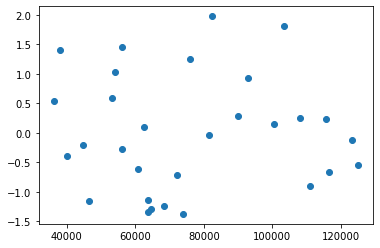

In [82]:
plt.scatter(y_hat,E)# Here we see no any patterns present so it gives the correct prediction

### Plotting the fitted line to the original dataset

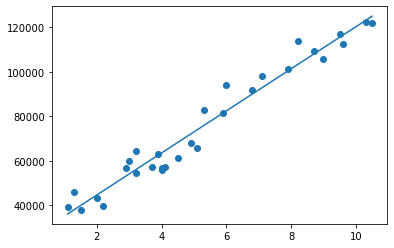

In [83]:
plt.scatter(x,y)
plt.plot(x,y_hat)

#### In the above figure we see that model is good fitted by the line so no any transformation is required to change the explanatory variable

In [84]:
#Coefficients
model.params

const              25792.200199
YearsExperience     9449.962321
dtype: float64

In [85]:
#t and p-Values
print(model.tvalues, '\n', model.pvalues)    

const              11.346940
YearsExperience    24.950094
dtype: float64 
 const              5.511950e-12
YearsExperience    1.143068e-20
dtype: float64


In [86]:
#R squared values
(model.rsquared,model.rsquared_adj)

(0.9569566641435086, 0.9554194021486339)

# Predict for new data point

In [87]:
# Lets take any values :- like 8 and 12 YEAR OF EXPERIENCE we have to predict the salary
newdata=pd.Series([8,12])

In [88]:
data_pred=pd.DataFrame(newdata,columns=['YEAR OF EXPERIENCE'])
data_pred

,YEAR OF EXPERIENCE
0,8
1,12


In [90]:
data_pred=smf.add_constant(data_pred["YEAR OF EXPERIENCE"])

In [91]:
model.predict(data_pred)

0    101391.898770
1    139191.748056
dtype: float64